# Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df= pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [5]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [6]:
cols_to_convert = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [7]:
df = df[df['ocean_proximity'] != 'ISLAND']

print(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: count, dtype: int64


In [8]:
x = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
train_data = x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15869,-122.41,37.76,52,2064,496,1726,466,3.4028,NEAR BAY,233300
647,-122.12,37.71,35,1037,207,552,210,4.0000,NEAR BAY,167900
18382,-121.83,37.23,7,5389,903,2232,825,6.6659,<1H OCEAN,500001
1864,-123.83,41.88,18,1504,357,660,258,3.1300,<1H OCEAN,116700
19583,-120.46,37.65,17,315,89,130,58,1.4464,INLAND,79200
...,...,...,...,...,...,...,...,...,...,...
11380,-117.95,33.68,27,1732,303,1115,308,5.5312,<1H OCEAN,239200
10506,-117.68,33.55,5,2262,427,1016,402,6.0650,<1H OCEAN,315500
11734,-121.06,38.91,18,6501,1416,2954,1373,2.5373,INLAND,143000
13457,-117.38,34.11,36,1497,264,894,275,3.3066,INLAND,96300


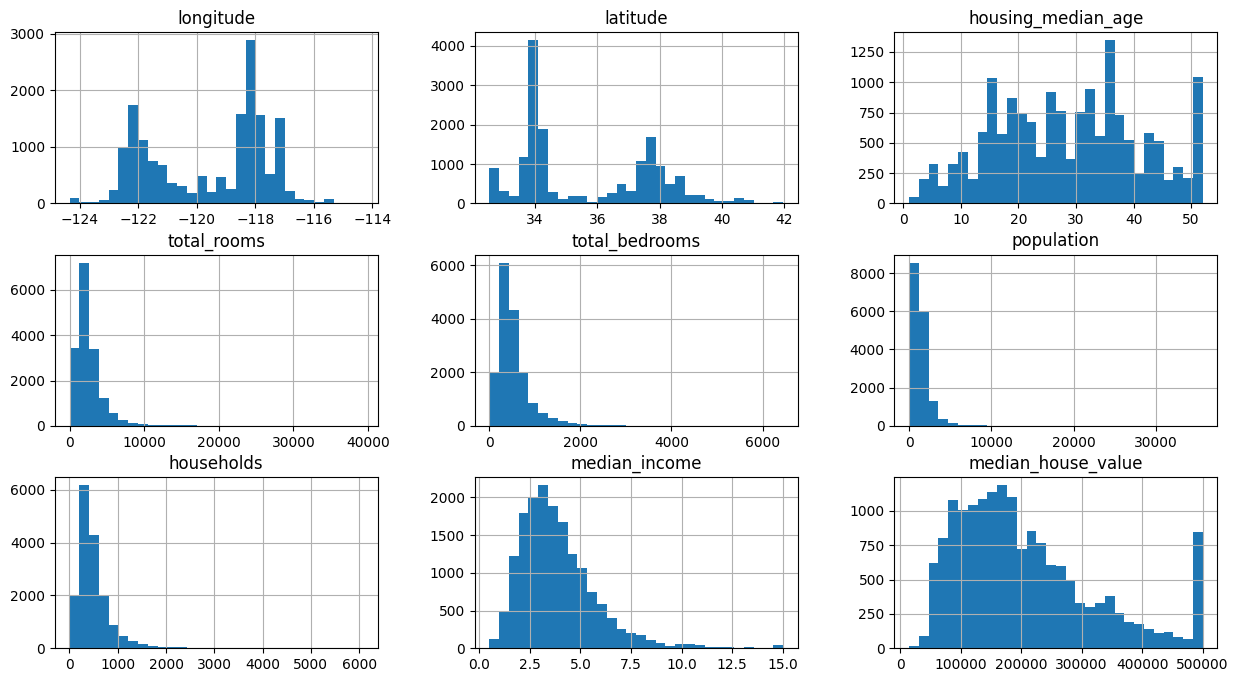

In [12]:
train_data.hist(figsize=(15, 8), bins=30)
plt.show()

In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

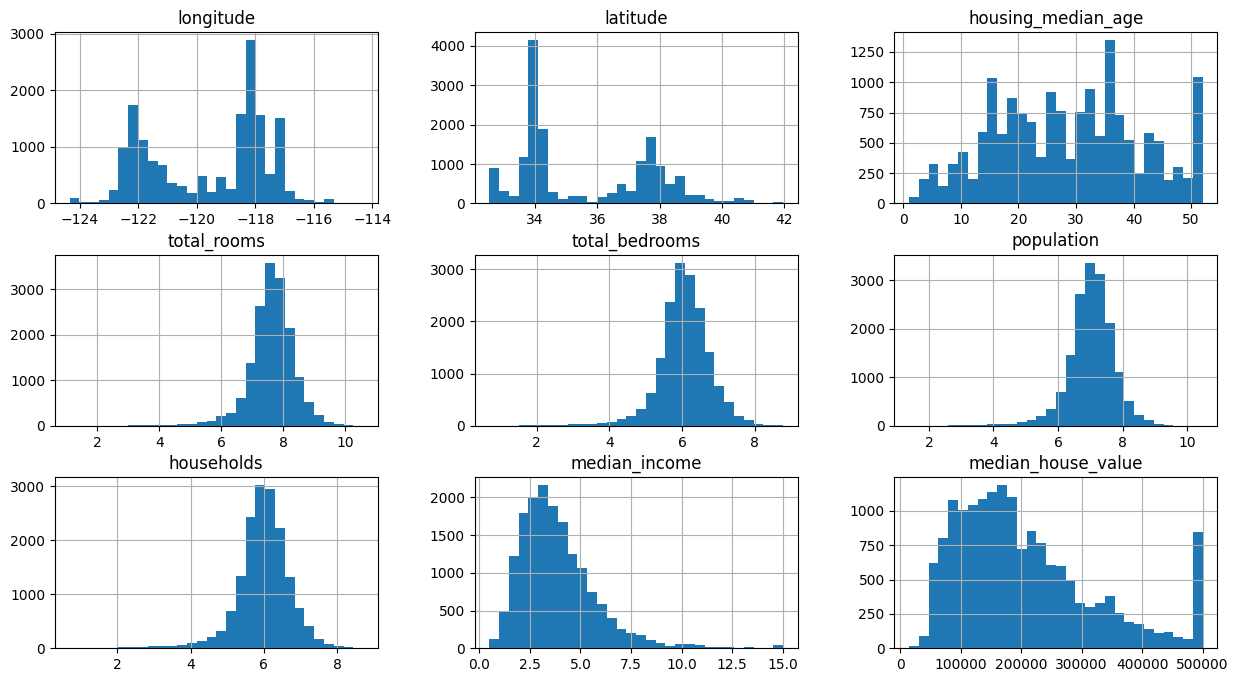

In [14]:
train_data.hist(figsize=(15, 8), bins=30)
plt.show()

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

In [16]:
train_data['income_cat'] = pd.cut(
    train_data['median_income'],
    bins=[-np.inf, 1.5, 3.0, 4.5, np.inf],
    labels=['very_low', 'low', 'medium', 'high']
)
train_data = train_data.join(pd.get_dummies(train_data['income_cat'], prefix='income', drop_first=True))
train_data = train_data.drop(columns=['income_cat'])

In [17]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

In [19]:
test_data = x_test.join(y_test)

# Log-transform skewed features
for col in ['total_rooms', 'total_bedrooms', 'population', 'households']:
    test_data[col] = np.log(test_data[col] + 1)

In [20]:
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(columns=['ocean_proximity'], axis=1)

In [21]:
test_data['income_cat'] = pd.cut(
    test_data['median_income'],
    bins=[-np.inf, 1.5, 3.0, 4.5, np.inf],
    labels=['very_low', 'low', 'medium', 'high']
)
test_data = test_data.join(pd.get_dummies(test_data['income_cat'], prefix='income', drop_first=True))
test_data = test_data.drop(columns=['income_cat'])

In [22]:
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [23]:
x_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [24]:
x_test_s = scaler.transform(x_test)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100)
}

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = {}

for name, model in models.items():
    print(f"\nTraining {name}")
    print("-" * len(name))

    if name == "Linear Regression":
        model.fit(x_train_s, y_train)          # scaled data
        y_pred = model.predict(x_test_s)
    else:
        model.fit(x_train, y_train)            # raw data
        y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

    print(f"{name} Result")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²   : {r2:.4f}")


Training Linear Regression
-----------------
Linear Regression Result
MAE : 49479.74
RMSE: 68356.87
R²   : 0.6475

Training Decision Tree
-------------
Decision Tree Result
MAE : 45171.79
RMSE: 72116.82
R²   : 0.6076

Training Random Forest
-------------
Random Forest Result
MAE : 32742.80
RMSE: 51115.26
R²   : 0.8029


In [39]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

mae_before = mean_absolute_error(y_test, y_pred)
rmse_before = np.sqrt(mean_squared_error(y_test, y_pred))
r2_before = r2_score(y_test, y_pred)

print("Baseline Performance")
print("MAE:", mae_before)
print("RMSE:", rmse_before)
print("R²:", r2_before)

Baseline Performance
MAE: 32742.804157984014
RMSE: 51115.26394336567
R²: 0.8028776865338723


In [41]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 5, 10]
}

# GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
81 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [44]:
y_pred_best = best_model.predict(x_test)

mae_after = mean_absolute_error(y_test, y_pred_best)
rmse_after = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_after = r2_score(y_test, y_pred_best)

print("Tuned Performance")
print("MAE:", mae_after)
print("RMSE:", rmse_after)
print("R²:", r2_after)

Tuned Performance
MAE: 35697.24015951862
RMSE: 53753.57915544989
R²: 0.7820035879331232


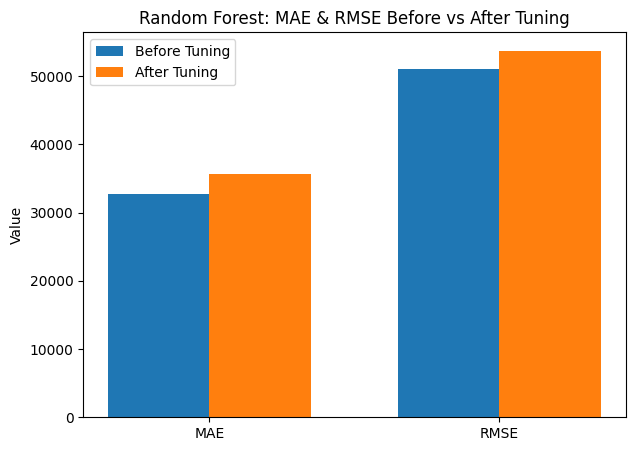

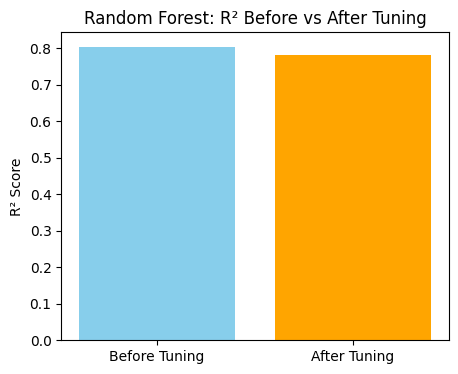

In [55]:
# MAE & RMSE
metrics_before = [mae_before, rmse_before]
metrics_after = [mae_after, rmse_after]
labels = ["MAE", "RMSE"]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, metrics_before, width, label="Before Tuning")
plt.bar(x + width/2, metrics_after, width, label="After Tuning")
plt.xticks(x, labels)
plt.ylabel("Value")
plt.title("Random Forest: MAE & RMSE Before vs After Tuning")
plt.legend()
plt.show()

# R² separately
plt.figure(figsize=(5,4))
plt.bar(["Before Tuning", "After Tuning"], [r2_before, r2_after],
        color=["skyblue","orange"])
plt.ylabel("R² Score")
plt.title("Random Forest: R² Before vs After Tuning")
plt.show()

Baseline Decision Tree Performance
MAE: 45171.78992003877
RMSE: 72116.82078993323
R²: 0.607619227375465
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters (Decision Tree): {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_split': 10}

Tuned Decision Tree Performance
MAE: 41922.25114637078
RMSE: 63634.20608739629
R²: 0.6944967516522418


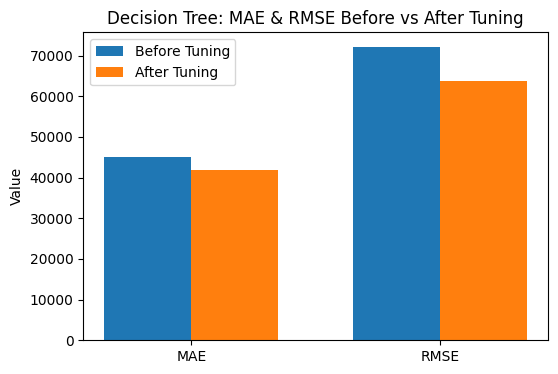

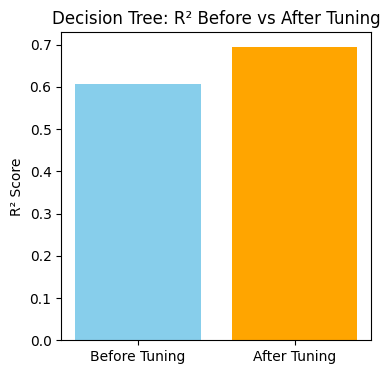

In [51]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt_before = dt.predict(x_test)

mae_dt_before = mean_absolute_error(y_test, y_pred_dt_before)
rmse_dt_before = np.sqrt(mean_squared_error(y_test, y_pred_dt_before))
r2_dt_before = r2_score(y_test, y_pred_dt_before)

print("Baseline Decision Tree Performance")
print("MAE:", mae_dt_before)
print("RMSE:", rmse_dt_before)
print("R²:", r2_dt_before)

param_grid_dt = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "criterion": ["squared_error", "friedman_mse", "absolute_error"]
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid_dt,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2
)

grid_search_dt.fit(x_train, y_train)
best_tree = grid_search_dt.best_estimator_
print("Best Hyperparameters (Decision Tree):", grid_search_dt.best_params_)

y_pred_dt = best_tree.predict(x_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("\nTuned Decision Tree Performance")
print("MAE:", mae_dt)
print("RMSE:", rmse_dt)
print("R²:", r2_dt)

metrics_before = [mae_dt_before, rmse_dt_before]
metrics_after = [mae_dt, rmse_dt]
labels = ["MAE", "RMSE"]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(6,4))
plt.bar(x - width/2, metrics_before, width, label="Before Tuning")
plt.bar(x + width/2, metrics_after, width, label="After Tuning")
plt.xticks(x, labels)
plt.ylabel("Value")
plt.title("Decision Tree: MAE & RMSE Before vs After Tuning")
plt.legend()
plt.show()

plt.figure(figsize=(4,4))
plt.bar(["Before Tuning", "After Tuning"], [r2_dt_before, r2_dt], color=["skyblue","orange"])
plt.ylabel("R² Score")
plt.title("Decision Tree: R² Before vs After Tuning")
plt.show()

## Reflection on Hyperparameter Tuning  

### 1. Which hyperparameters made the biggest difference?  
- **Decision Tree**:  
  - `max_depth` and `min_samples_split` controlled the complexity of the tree.  
  - A shallower tree with a higher split threshold reduced overfitting and improved generalization.  
- **Random Forest**:  
  - `n_estimators` and `max_features` had the largest effect.  
  - Increasing the number of trees smoothed predictions, but adjusting `max_features` sometimes reduced performance on unseen data.  


### 2. Did tuning improve performance or not? Why?  
- **Decision Tree**:  
  - Performance improved — MAE and RMSE decreased, and R² increased.  
  - This shows that constraining tree depth created a better bias–variance balance.  
- **Random Forest**:  
  - Performance did **not** improve: R² actually decreased after tuning.  
  - This likely happened because the chosen hyperparameters led to **slight underfitting**, the model became too constrained compared to the baseline, even though errors like MAE/RMSE might have been similar.  
  - It highlights that tuning is not always about blindly improving metrics, but about exploring trade-offs and ensuring the parameter grid is appropriate.  


### 3. What’s the trade-off between accuracy and computation time?  
- **Decision Tree**:  
  - Tuning was quick, and the improvements were noticeable.  
- **Random Forest**:  
  - Tuning was computationally much more expensive because multiple trees had to be built for each hyperparameter combination.  
  - Despite higher cost, the performance didn’t improve in this case — showing that tuning must be carefully guided, as more computation doesn’t always equal better results.  
